# PDBBind 2020

Downloaded from https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_PP.tar.gz (Cloud CDN of http://www.pdbbind.org.cn/download/PDBbind_v2020_PP.tar.gz)

In [2]:
import os
import pandas as pd
from abag_affinity.utils.config import read_config, get_data_paths
import matplotlib.pyplot as plt
import seaborn as sns

config = read_config("../../config.yaml")
summary_path = os.path.join(config["DATASETS"]["path"], config["DATASETS"]["PDBBind"]["folder_path"], config["DATASETS"]["PDBBind"]["summary"])

In [3]:
summary_df = pd.read_csv(summary_path, index_col=0)
summary_df["validation"] = summary_df["validation"].astype(str).apply(lambda x: x.split(".")[0] if x != "nan" else "0")
print("There are {} complexes".format( len(summary_df["pdb"].unique())))
summary_df.head()

There are 1072 complexes


,pdb,filename,-log(Kd),delta_g,chain_infos,validation,test
2l1l,2l1l,2l1l.pdb,8.154902,-11.125301,"{'a': 0, 'b': 1}",0,False
4k94,4k94,4k94.pdb,9.200659,-12.551972,"{'l': 0, 'h': 0, 'c': 1}",12,False
2j5l,2j5l,2j5l.pdb,7.113509,-9.704584,"{'a': 0, 'b': 1, 'c': 1}",3,False
4rgo,4rgo,4rgo.pdb,8.102373,-11.053638,"{'s': 0, 'h': 1, 'l': 1}",0,False
4hix,4hix,4hix.pdb,6.821023,-9.305560,"{'h': 0, 'l': 0, 'a': 1}",0,False


### Affinity distribution

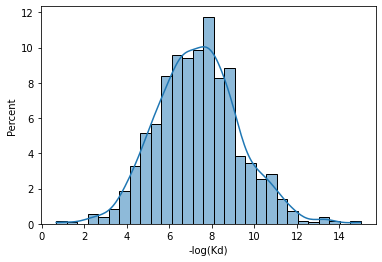

In [4]:
sns.histplot(summary_df, x="-log(Kd)", kde=True, stat="percent")
plt.savefig("./plots/pdbbind_-log(Kd)_distribution.png")

In [5]:
summary_df["-log(Kd)"].describe()

count    1072.000000
mean        7.346498
std         1.948411
min         0.673664
25%         6.016707
50%         7.301030
75%         8.552842
max        15.000000
Name: -log(Kd), dtype: float64

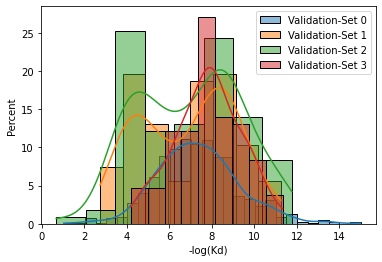

In [6]:
colors = sns.color_palette()
for i in range(4):
    val_df = summary_df[summary_df["validation"].str.contains(str(i))]
    sns.histplot(val_df, x="-log(Kd)", label=f"Validation-Set {i}", color=colors[i], kde=True, stat="percent")

plt.legend() 
plt.savefig("./plots/pdbbind_-log(Kd)_distribution_by_val_set.png")
plt.show()